In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [94]:
oil_df = pd.read_csv("./data/oil.csv",parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date')
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
transactions_df = pd.read_csv("./data/transactions.csv",parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date')
holiday_df = pd.read_csv("./data/holidays_events.csv",parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date')


In [95]:
transactions_df

store_nbr  transactions
date                               
2013-01-01         25           770
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922
...               ...           ...
2017-08-15         50          2804
2017-08-15         51          1573
2017-08-15         52          2255
2017-08-15         53           932
2017-08-15         54           802

[83488 rows x 2 columns]

<AxesSubplot:xlabel='date'>

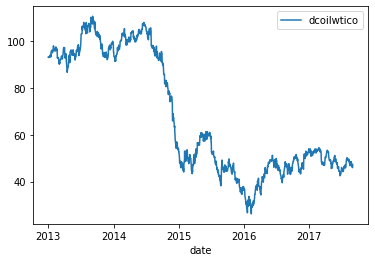

In [96]:
oil_df["dcoilwtico"].fillna(method='bfill', inplace=True)
sb.lineplot(data=oil_df)


In [97]:
transactions_oil_df = pd.DataFrame(columns=["transactions","oil"],dtype=np.float64)
transactions_oil_df

Empty DataFrame
Columns: [transactions, oil]
Index: []

In [98]:
for date in transactions_df.index.drop_duplicates():
    t = transactions_df.loc[transactions_df.index == date].transactions.mean()
    transactions_oil_df.at[date,"transactions"] = t
    if date in oil_df.index:
        transactions_oil_df.at[date,"oil"] = oil_df.at[date,"dcoilwtico"]
transactions_oil_df["oil"].fillna(method='bfill', inplace=True)
transactions_oil_df

transactions    oil
2013-01-01    770.000000  93.14
2013-01-02   2026.413043  93.14
2013-01-03   1706.608696  92.97
2013-01-04   1706.391304  93.12
2013-01-05   2034.195652  93.20
...                  ...    ...
2017-08-11   1658.351852  48.81
2017-08-12   1665.314815  47.59
2017-08-13   1592.462963  47.59
2017-08-14   1582.370370  47.59
2017-08-15   1602.981481  47.57

[1682 rows x 2 columns]

<AxesSubplot:ylabel='oil'>

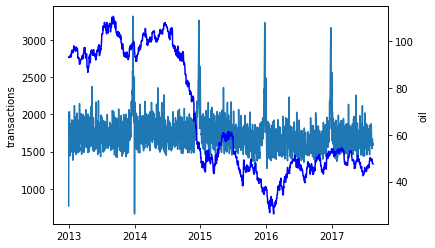

In [99]:
sb.lineplot(data=transactions_oil_df["transactions"])
ax2 = plt.twinx()
sb.lineplot(data=transactions_oil_df["oil"], color="b", ax=ax2)

In [100]:
print(transactions_oil_df.dtypes)
correlation = transactions_oil_df.corr()
correlation

transactions    float64
oil             float64
dtype: object


transactions       oil
transactions      1.000000  0.103461
oil               0.103461  1.000000

In [101]:
"""
transactions_oil_df = transactions_oil_df.loc[transactions_oil_df.index > pd.to_datetime("2015-01-01")]
sb.lineplot(data=transactions_oil_df["transactions"])
ax2 = plt.twinx()
sb.lineplot(data=transactions_oil_df["oil"], color="b", ax=ax2)
plt.figure(figsize=(16,9))
plt.show()
print(transactions_oil_df.dtypes)
correlation = transactions_oil_df.corr()
correlation
"""

'\ntransactions_oil_df = transactions_oil_df.loc[transactions_oil_df.index > pd.to_datetime("2015-01-01")]\nsb.lineplot(data=transactions_oil_df["transactions"])\nax2 = plt.twinx()\nsb.lineplot(data=transactions_oil_df["oil"], color="b", ax=ax2)\nplt.figure(figsize=(16,9))\nplt.show()\nprint(transactions_oil_df.dtypes)\ncorrelation = transactions_oil_df.corr()\ncorrelation\n'

In [102]:
from joblib import Parallel, delayed

category_index  = train_df["family"].drop_duplicates()
c = ["all"]
c += category_index.to_list()
category_df = pd.DataFrame(index=transactions_oil_df.index, columns=c)
category_df["all"] = transactions_oil_df["transactions"]

def calc(cat):
    tp = train_df.loc[train_df["family"] == cat]
    for d in category_df.index:
        category_df.at[d,cat] = tp.loc[pd.to_datetime(tp["date"]) == d]["sales"].mean()
        print(cat,d)

Parallel(n_jobs=-1, require='sharedmem')(delayed(calc)(cat) for cat in category_index)

category_df

BABY CARE 2013-01-01 00:00:00
BOOKS 2013-01-01 00:00:00
AUTOMOTIVE 2013-01-01 00:00:00
BEVERAGES 2013-01-01 00:00:00
BEAUTY 2013-01-01 00:00:00
CELEBRATION 2013-01-01 00:00:00
BREAD/BAKERY 2013-01-01 00:00:00
BOOKS 2013-01-02 00:00:00
BREAD/BAKERY 2013-01-02 00:00:00
AUTOMOTIVE 2013-01-02 00:00:00
CELEBRATION 2013-01-02 00:00:00
BABY CARE 2013-01-02 00:00:00
BEAUTY 2013-01-02 00:00:00
BEVERAGES 2013-01-02 00:00:00
CLEANING 2013-01-01 00:00:00
BREAD/BAKERY 2013-01-03 00:00:00
BOOKS 2013-01-03 00:00:00
BABY CARE 2013-01-03 00:00:00
BEVERAGES 2013-01-03 00:00:00
AUTOMOTIVE 2013-01-03 00:00:00
CELEBRATION 2013-01-03 00:00:00
BEAUTY 2013-01-03 00:00:00
BABY CARE 2013-01-04 00:00:00
BREAD/BAKERY 2013-01-04 00:00:00
CLEANING 2013-01-02 00:00:00
BEVERAGES 2013-01-04 00:00:00
BEAUTY 2013-01-04 00:00:00
AUTOMOTIVE 2013-01-04 00:00:00
BOOKS 2013-01-04 00:00:00
CELEBRATION 2013-01-04 00:00:00
BREAD/BAKERY 2013-01-05 00:00:00
BEAUTY 2013-01-05 00:00:00
BABY CARE 2013-01-05 00:00:00
CLEANING 2013-01

KeyboardInterrupt: 

PERSONAL CARE 2013-04-21 00:00:00
PRODUCE 2013-03-06 00:00:00
POULTRY 2013-03-28 00:00:00
MEATS 2013-05-02 00:00:00
PREPARED FOODS 2013-03-26 00:00:00
PET SUPPLIES 2013-04-11 00:00:00


In [ ]:
category_index  = train_df["family"].drop_duplicates()
c = ["all"]
c += category_index.to_list()
category_df = pd.DataFrame(index=transactions_oil_df.index, columns=c)
category_df["all"] = transactions_oil_df["transactions"]
for cat in category_index:
    tp = train_df.loc[train_df["family"] == cat]
    print(tp)
    for d in category_df.index:
        category_df.at[d,cat] = tp.loc[pd.to_datetime(tp["date"]) == d]["sales"].mean()
        print(cat,d)
category_df

              id        date  store_nbr      family  sales  onpromotion
0              0  2013-01-01          1  AUTOMOTIVE    0.0            0
33            33  2013-01-01         10  AUTOMOTIVE    0.0            0
66            66  2013-01-01         11  AUTOMOTIVE    0.0            0
99            99  2013-01-01         12  AUTOMOTIVE    0.0            0
132          132  2013-01-01         13  AUTOMOTIVE    0.0            0
...          ...         ...        ...         ...    ...          ...
3000723  3000723  2017-08-15         54  AUTOMOTIVE    8.0            0
3000756  3000756  2017-08-15          6  AUTOMOTIVE    7.0            0
3000789  3000789  2017-08-15          7  AUTOMOTIVE    5.0            0
3000822  3000822  2017-08-15          8  AUTOMOTIVE    4.0            0
3000855  3000855  2017-08-15          9  AUTOMOTIVE   15.0            0

[90936 rows x 6 columns]
AUTOMOTIVE 2015-01-02 00:00:00
AUTOMOTIVE 2015-01-03 00:00:00
AUTOMOTIVE 2015-01-04 00:00:00
AUTOMOTIVE 2015-0

all AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS  \
2015-01-02  2016.854167   8.611111       0.0  4.592593  2062.092593       0.0   
2015-01-03  2006.000000   7.592593       0.0  3.796296  2042.518519       0.0   
2015-01-04  1968.666667   8.333333       0.0  4.888889  2267.833333       0.0   
2015-01-05  1851.666667   6.074074       0.0  2.851852  1641.185185       0.0   
2015-01-06  1720.437500   5.111111       0.0  2.555556  1356.351852       0.0   
...                 ...        ...       ...       ...          ...       ...   
2017-08-11  1658.351852   8.166667   0.12963       6.5  3502.055556       0.0   
2017-08-12  1665.314815   7.462963  0.055556  6.833333  3376.259259       0.0   
2017-08-13  1592.462963   8.907407  0.166667  8.018519  3747.296296  0.018519   
2017-08-14  1582.370370   5.407407  0.166667  6.240741   3237.62963       0.0   
2017-08-15  1602.981481   6.240741  0.148148  6.277778  3162.462963       0.0   

           BREAD/BAKERY CELEBRATION     CLEANING        DAIRY  ... MAGAZINES  \
2015-01-02    550.05424         0.0  1545.018519   805.074074  ...       0.0   
2015-01-03    542.68676         0.0  1549.037037        846.5  ...       0.0   
2015-01-04   710.941224         0.0  1712.148148  1054.092593  ...       0.0   
2015-01-05   544.028575         0.0  1408.703704   808.388889  ...       0.0   
2015-01-06   468.927333         0.0  1193.666667   642.907407  ...       0.0   
...                 ...         ...          ...          ...  ...       ...   
2017-08-11   522.305296   16.111111  1031.148148   831.648148  ...  9.259259   
2017-08-12   507.473111   15.722222   1072.87037   793.592593  ...  8.944444   
2017-08-13   615.976981   10.074074  1143.648148        928.0  ...  8.685185   
2017-08-14   518.564019        11.0  1019.111111   797.222222  ...  8.462963   
2017-08-15   539.966574   11.055556  1082.851852   753.833333  ...  8.537037   

                 MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS  \
2015-01-02  451.300074    436.685185          0.0                     0.0   
2015-01-03   389.71359    454.277778          0.0                     0.0   
2015-01-04  411.083426    507.925926          0.0                     0.0   
2015-01-05  304.664461    380.851852          0.0                     0.0   
2015-01-06  303.352538    304.814815          0.0                     0.0   
...                ...           ...          ...                     ...   
2017-08-11  498.964667    295.888889     10.87037               12.111111   
2017-08-12  329.178706         294.5     9.407407               13.185185   
2017-08-13  345.055834    336.814815    10.018519               13.722222   
2017-08-14  314.364556    279.203704     7.722222                9.259259   
2017-08-15  332.003166    273.833333     6.740741               10.962963   

               POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES  \
2015-01-02  496.557148     111.747611         14.0                        0.0   
2015-01-03  462.886186     107.590629    11.018519                        0.0   
2015-01-04  509.404759     114.246055     5.037037                        0.0   
2015-01-05  380.842556       89.21963     1.333333                        0.0   
2015-01-06  374.238537      77.426722     1.148148                        0.0   
...                ...            ...          ...                        ...   
2017-08-11   468.85737      96.286926    2198.8545                  65.240741   
2017-08-12  354.342779      84.693815  2070.154646                  67.481481   
2017-08-13  379.801204      91.509426  2331.922267                  68.851852   
2017-08-14  344.398297        86.0625  2134.399926                  52.333333   
2017-08-15  325.679815      85.954129  2316.832796                  46.851852   

              SEAFOOD  
2015-01-02  29.931852  
2015-01-03  25.365722  
2015-01-04  31.744407  
2015-01-05     23.949  
2015-01-06  21.157593  
...               ...  
2017-08-11  23.56696

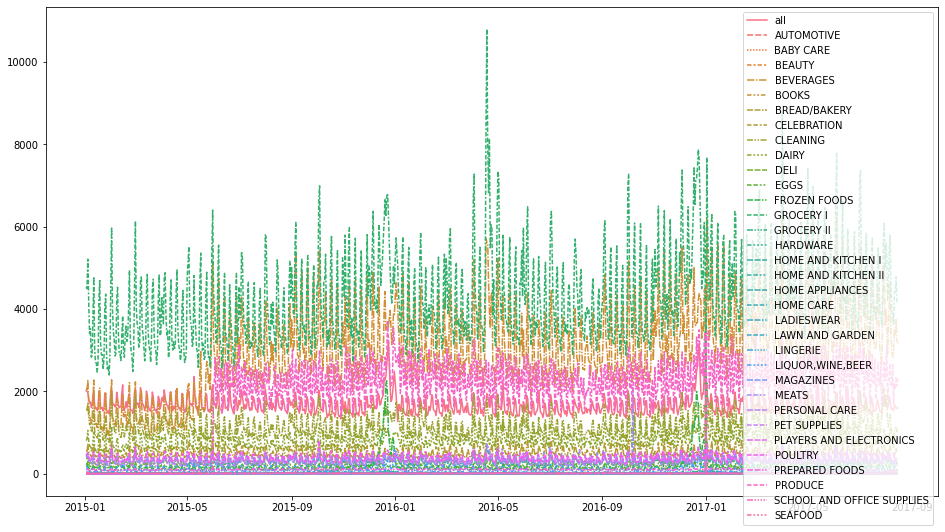

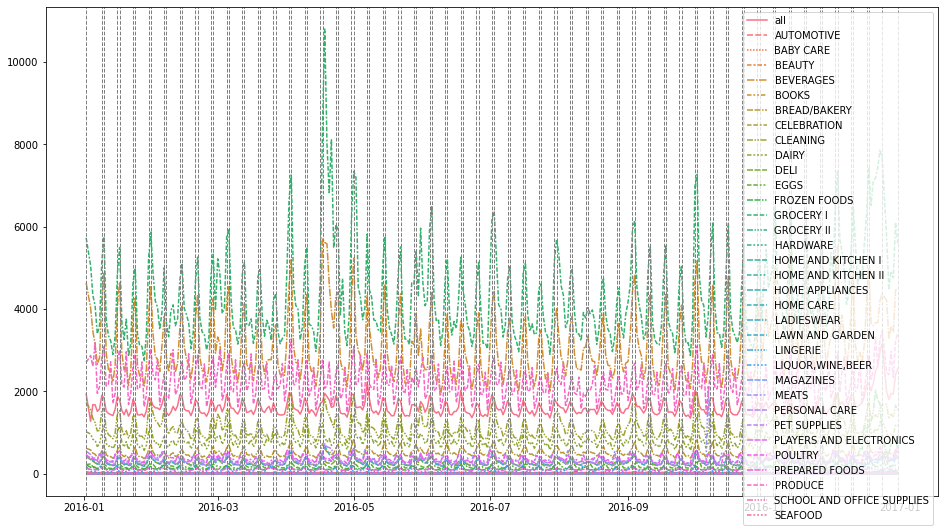

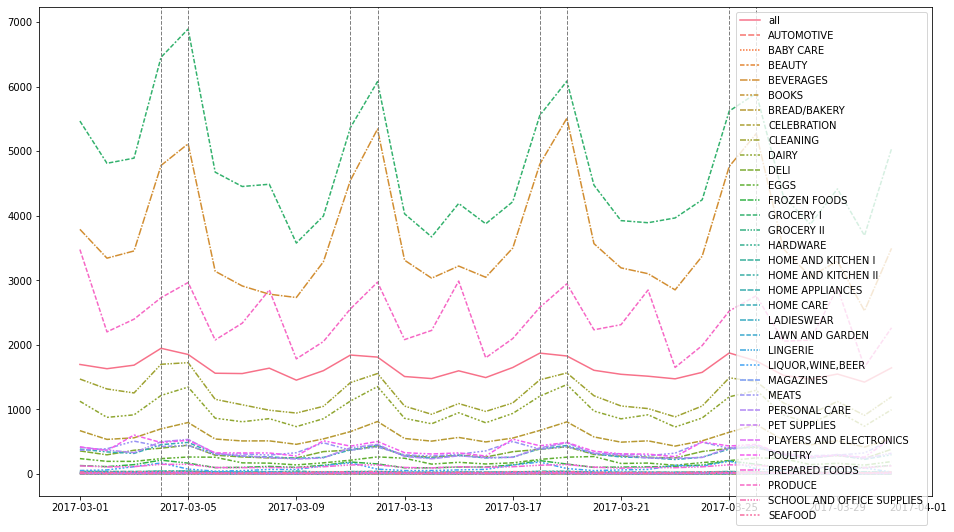

In [ ]:
plt.figure(figsize=(16,9))
sb.lineplot(data=category_df)
plt.show()
plt.figure(figsize=(16,9))
sb.lineplot(data=category_df.loc[(category_df.index >= pd.to_datetime("2016-01-01")) & (category_df.index < pd.to_datetime("2017-01-01"))])
for d in category_df.loc[(category_df.index >= pd.to_datetime("2016-01-01")) & (category_df.index < pd.to_datetime("2017-01-01"))].index:
    if d.weekday() > 4:
        plt.axvline(x=d, ymin=0,linewidth = 1, linestyle ="--", color="gray")
plt.show()
plt.figure(figsize=(16,9))

sb.lineplot(data=category_df.loc[(category_df.index >= pd.to_datetime("2017-03-01")) & (category_df.index < pd.to_datetime("2017-04-01"))])
for d in category_df.loc[(category_df.index >= pd.to_datetime("2017-03-01")) & (category_df.index < pd.to_datetime("2017-04-01"))].index:
    if d.weekday() > 4:
        plt.axvline(x=d, ymin=0,linewidth = 1, linestyle ="--", color="gray")
plt.show()

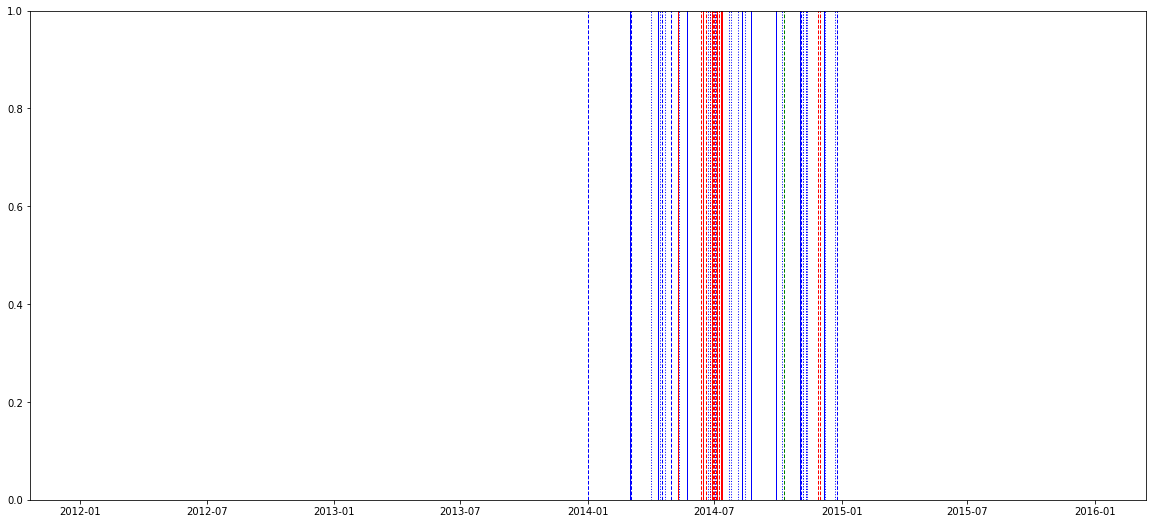

In [ ]:
duration = [pd.to_datetime("2014-01-01"), pd.to_datetime("2015-01-01")]

holiday_type = ["Holiday", "Event", "Transfer"]
plt.figure(figsize=(20,9))
sb.lineplot(data=category_df.loc[(category_df.index >= duration[0]) & (category_df.index < duration[1])])

color = ["blue", "red", "green"]


for type in range(len(holiday_type)):
    holiday_index = holiday_df.loc[(holiday_df["type"] == holiday_type[type]) & (holiday_df["transferred"] == False) & (holiday_df.index >= duration[0]) & (holiday_df.index < duration[1])].index
    for i in holiday_index:
        if i.weekday() > 4:
            plt.axvline(x=i, ymin=0,linewidth = 1, linestyle ="-", color=color[type])
        elif "National" in holiday_df.at[i,"locale"]:
            plt.axvline(x=i, ymin=0,linewidth = 1, linestyle ="--", color=color[type])
        else:
            plt.axvline(x=i, ymin=0,linewidth = 1, linestyle =":", color=color[type])

plt.show()

In [15]:
train_df

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder

train_df["date"] = train_df["date"].astype("datetime64")
train_df = train_df.loc[train_df["date"] > pd.to_datetime("2015-01-01")]

X = train_df[["date", "store_nbr", "family", "onpromotion"]]
Y = train_df["sales"]
X

date  store_nbr                      family  onpromotion
1299078 2015-01-02          1                  AUTOMOTIVE            0
1299079 2015-01-02          1                   BABY CARE            0
1299080 2015-01-02          1                      BEAUTY            0
1299081 2015-01-02          1                   BEVERAGES            1
1299082 2015-01-02          1                       BOOKS            0
...            ...        ...                         ...          ...
3000883 2017-08-15          9                     POULTRY            0
3000884 2017-08-15          9              PREPARED FOODS            1
3000885 2017-08-15          9                     PRODUCE          148
3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES            8
3000887 2017-08-15          9                     SEAFOOD            0

[1701810 rows x 4 columns]

In [17]:

X["date"] = X["date"].dt.strftime("%Y%m%d").astype(int)

le = LabelEncoder()                            # 創造 Label Encoder
le.fit(X['family'])                         # 給予每個類別一個數值
X['family'] = le.transform(X['family'])  # 轉換所有類別成為數值
X

/tmp/ipykernel_5159/2207048821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["date"] = X["date"].dt.strftime("%Y%m%d").astype(int)
/tmp/ipykernel_5159/2207048821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['family'] = le.transform(X['family'])  # 轉換所有類別成為數值


date  store_nbr  family  onpromotion
1299078  20150102          1       0            0
1299079  20150102          1       1            0
1299080  20150102          1       2            0
1299081  20150102          1       3            1
1299082  20150102          1       4            0
...           ...        ...     ...          ...
3000883  20170815          9      28            0
3000884  20170815          9      29            1
3000885  20170815          9      30          148
3000886  20170815          9      31            8
3000887  20170815          9      32            0

[1701810 rows x 4 columns]

In [18]:
Y

1299078       2.000
1299079       0.000
1299080       3.000
1299081     794.000
1299082       0.000
             ...   
3000883     438.133
3000884     154.553
3000885    2419.729
3000886     121.000
3000887      16.000
Name: sales, Length: 1701810, dtype: float64

In [19]:
pred_X = test_df[["date", "store_nbr", "family", "onpromotion"]]
pred_X["date"] = pred_X["date"].str.replace("-","").astype(int)
le = LabelEncoder()                            # 創造 Label Encoder
le.fit(pred_X['family'])                         # 給予每個類別一個數值
pred_X['family'] = le.transform(pred_X['family'])  # 轉換所有類別成為數值

/tmp/ipykernel_5159/3714848995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_X["date"] = pred_X["date"].str.replace("-","").astype(int)
/tmp/ipykernel_5159/3714848995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_X['family'] = le.transform(pred_X['family'])  # 轉換所有類別成為數值


In [20]:
from sklearn.svm import SVR

M = SVR()
M.fit(X,Y)


In [ ]:
pred_Y =  M.predict(X)
